In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [3]:
df1 = pd.read_json('Players_ex_gk_detailed_table.json')
df2 = pd.read_json('Gk_detailed_table.json')
df = pd.concat([df2, df1], ignore_index=True, sort=False)
df = df.sort_values('Player_id', ascending=False)
df = df.reset_index(drop=True)

In [4]:
cols_with_dash = df.columns[df.isin(['-']).any()]
df[cols_with_dash] = df[cols_with_dash].replace('-', 0)
df.Assists = df.Assists.fillna(0)
cols_to_convert = ['Player_id', 'Apperance', 'Goals','Assists']
df[cols_to_convert] = df[cols_to_convert].astype(int)

In [5]:
# Get the distribution of the number of games players play in a season. Also show what percentage of games the players participated in.

top_leagues = ['Serie A', 'LaLiga', 'Bundesliga', 'Premier League', 'Ligue 1']
filtered_df = df[df['Competition'].isin(top_leagues)]
filtered_df = filtered_df[filtered_df['Season'] == '21/22']
total_games = filtered_df['Apperance'].sum()
games_played = filtered_df.groupby('Player_id')['Apperance'].sum()
temp = pd.DataFrame(games_played)

In [6]:
value_counts = temp['Apperance'].value_counts()
sorted_value_counts = value_counts.sort_index()

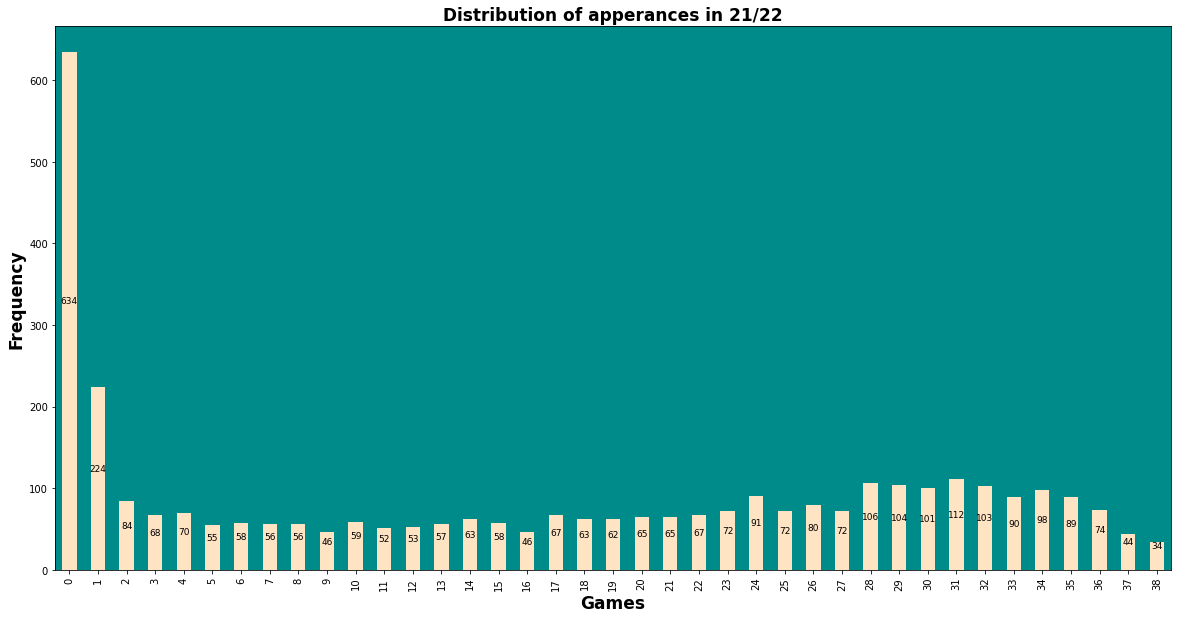

In [18]:
# Plot the distribution as a bar plot
plt.figure(figsize=(20, 10)) 
ax = sorted_value_counts.plot(kind='bar',color = 'bisque')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=9 )
    

plt.xlabel('Games', fontsize=17 ,fontweight = 'bold')
plt.ylabel('Frequency', fontsize=17 ,fontweight = 'bold')
plt.title('Distribution of apperances in 21/22', fontsize=17 ,fontweight = 'bold')
ax.set_facecolor('darkcyan')
plt.show()